<a href="https://colab.research.google.com/github/Muzzarino2811/20_MuzzarinoAkbar/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:

  a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan
pada akun github seperti pada modul sebelumnya.

  b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan  

  c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

# Konvolusi tanpa Library

**Membuat fungsi konvolusi**

fungsi konvolusi yang dibuat memiliki parameter berupa :

1. citra masukan
2. kernel berupa matriks untuk memfilter citra
3. nilai stride / besarnya pergeseran untuk setiap konvolusi
4. nilai pad yang akan ditambahkan pada citra

In [5]:
def convolution2d(image, kernel, stride, pad):
    # Tentukan ukuran kernel
    kernel_height, kernel_width = kernel.shape

    # Tambahkan padding ke citra
    if pad > 0:
        image_padded = np.pad(image, ((pad, pad), (pad, pad)), mode='constant')
    else:
        image_padded = image

    # Tentukan ukuran output berdasarkan stride dan padding
    output_height = (image_padded.shape[0] - kernel_height) // stride + 1
    output_width = (image_padded.shape[1] - kernel_width) // stride + 1

    # Siapkan array untuk hasil konvolusi
    output = np.zeros((output_height, output_width))

    # Lakukan proses konvolusi
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Ambil bagian dari citra yang sesuai dengan kernel
            region = image_padded[y * stride: y * stride + kernel_height,
                                  x * stride: x * stride + kernel_width]
            # Lakukan operasi dot product antara kernel dan region citra
            output[y, x] = np.sum(region * kernel)

    # **Clipping dan Normalisasi** hasil agar tetap dalam rentang [0, 255]
    # Clipping nilai piksel agar berada di rentang 0 - 255
    output = np.clip(output, 0, 255)

    # Konversi output ke tipe data uint8
    output = output.astype(np.uint8)

    return output


d. Load citra yang akan diproses dan ubah menjadi citra keabuan

In [2]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

In [3]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

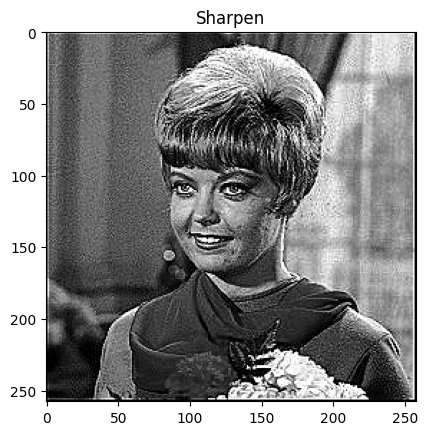

In [6]:
sharpen = convolution2d(img_gray,kernel_sharpen,1,2)

plt.title('Sharpen')
plt.imshow(sharpen, cmap='gray')
plt.show()

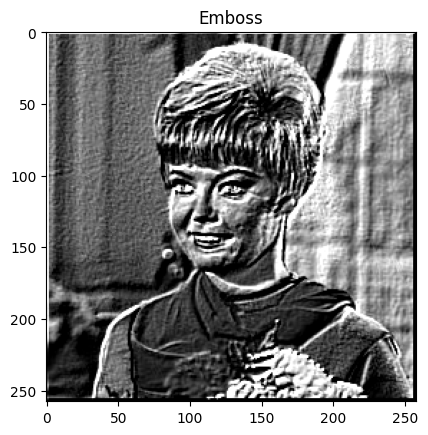

In [7]:
kernel_emboss = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])

emboss = convolution2d(img_gray,kernel_emboss,1,2)

plt.title('Emboss')
plt.imshow(emboss, cmap='gray')
plt.show()

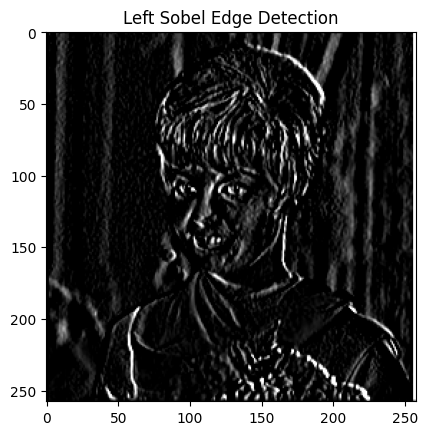

In [8]:
kernel_lsed = np.array([[1,-0,-1],
                           [2,0,-2],
                           [1,0,-1]])

lsed = convolution2d(img_gray,kernel_lsed,1,2)

plt.title('Left Sobel Edge Detection')
plt.imshow(lsed, cmap='gray')
plt.show()

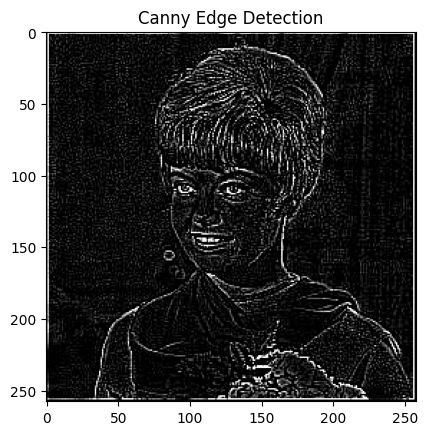

In [9]:
kernel_ced = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]])

ced = convolution2d(img_gray,kernel_ced,1,2)

plt.title('Canny Edge Detection')
plt.imshow(ced, cmap='gray')
plt.show()

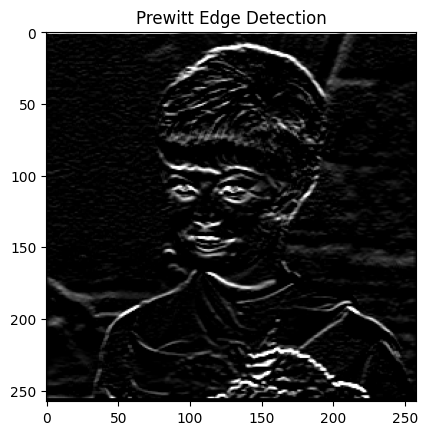

In [10]:
kernel_ped = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

ped = convolution2d(img_gray,kernel_ped,1,2)

plt.title('Prewitt Edge Detection')
plt.imshow(ped, cmap='gray')
plt.show()

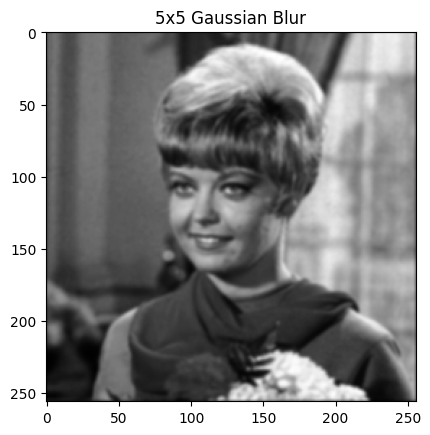

In [11]:
# Fungsi untuk membuat kernel Gaussian
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) *
                      np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)  # Normalisasi kernel

# Buat kernel Gaussian 5x5
kernel_gaussian5 = gaussian_kernel(size=5, sigma=1)

gaussian5 = convolution2d(img_gray,kernel_gaussian5,1,2)

plt.title('5x5 Gaussian Blur')
plt.imshow(gaussian5, cmap='gray')
plt.show()

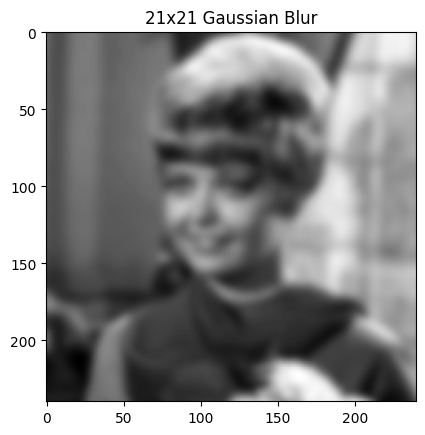

In [12]:
# Buat kernel Gaussian 21x21
kernel_gaussian21 = gaussian_kernel(size=21, sigma=3)

gaussian21 = convolution2d(img_gray,kernel_gaussian21,1,2)

plt.title('21x21 Gaussian Blur')
plt.imshow(gaussian21, cmap='gray')
plt.show()